### NYC Bike 대여 기록 데이터

1. 데이터 준비 및 탐색

- 데이터셋을 불러오고 기본적인 통계량을 확인하세요.

- 데이터의 크기와 결측치의 개수를 확인해보세요.

- 데이터의 변수 타입을 확인하고, 범주형 변수와 연속형 변수를 구분해보세요.

- 각 데이터에 대해서 확인해보고 싶은 정보를 미리 구상해보세요.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_bike = pd.read_csv('https://raw.githubusercontent.com/BokyungChoi/teaching_in_GrowthHackers/refs/heads/master/Session%2003.%20EDA%20%26%20Data%20Visualization/nyc_citibike.csv')

df_bike.tail(2).T

,72033,72034
start_date,2018-05-01,2018-05-01
end_date,2018-05-01,2018-05-01
start_hour,22,23
end_hour,23,23
trip_duration,427,417
start_station_id,379,445
start_station_name,W 31 St & 7 Ave,E 10 St & Avenue A
start_station_latitude,40.749156,40.727408
start_station_longitude,-73.9916,-73.98142
end_station_id,477,285


In [4]:
df_bike.shape  # 데이터 크기확인

(72035, 18)

In [5]:
df_bike.head(5)

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [6]:
df_bike.info() # 변수 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

In [7]:
df_bike.describe() # 기초 통계량 확인

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [ ]:
# EDA 시 column 정리하는 방법 가이드 -> column리스트 print찍고 목적에 맞게 변수 구분하기
print(list(df_bike.columns))


['start_date', 'end_date', 'start_hour', 'end_hour', 'trip_duration', 'birth_year', 'day_since_register',
 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', # 연속형
 'start_station_id', 'end_station_id', 'bike_id' # 별로 안중요한 id
 'start_station_name', 'end_station_name', 'usertype', 'gender' # 카테고리?
 ]



['start_date', 'end_date', 'start_hour', 'end_hour', 'trip_duration', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'usertype', 'birth_year', 'gender', 'day_since_register']


In [ ]:
# 연속형과 범주형구분
numeric_col = ['start_date', 'end_date', 'start_hour', 'end_hour', 'trip_duration', 'birth_year', 'day_since_register',
               'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']

category_col = ['start_station_name', 'end_station_name', 'usertype', 'gender']

2. 단일 변수 분석

- `trip_duration` 칼럼의 기초 통계를 구해보고, 평균 및 중앙값을 비교해보세요. 그래프를 그려 이상치가 존재하는지 확인하고, 이상치를 제거한 후의 분포를 다시 시각화해보세요.

- 결과에 대해 나름대로 해석한 결과를 정리해보세요.

- `start_hour`의 빈도 분포를 시각화하고, 가장 대여가 많은 시간대는 언제인지 확인하세요. - 그리고 그 결과에 대해 나름대로 해석한 결과를 정리해보세요.

- `gender`에 따른 빈도 분포를 시각화하고, 그 결과에 대해 나름대로 해석한 결과를 정리해보세요.

In [13]:
df_bike['trip_duration'].describe()

count    7.203500e+04
mean     1.046751e+03
std      8.139700e+03
min      6.100000e+01
25%      3.980000e+02
50%      6.810000e+02
75%      1.201000e+03
max      1.344462e+06
Name: trip_duration, dtype: float64

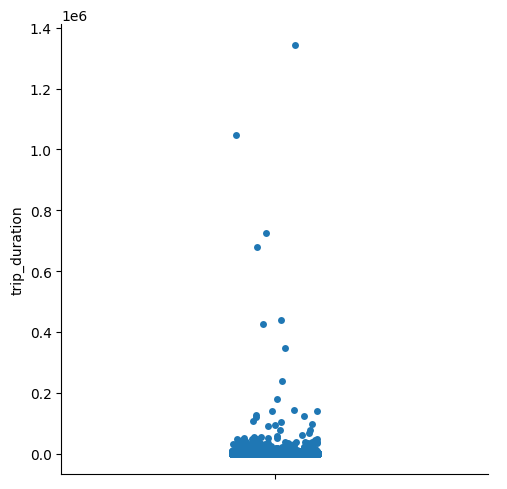

In [ ]:
# 이상치 확인용 시각화
sns.catplot(y='trip_duration', data=df_bike, kind='strip')

> 이상치가 너무 심하게 차이나는 것들은 잘못대여하고 곧바로 반납? 혹은 도난? 제거하는게 좋겠다

In [10]:
# 이상치 제거기준: (Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR)

Q1 = df_bike['trip_duration'].quantile(0.25)
Q3 = df_bike['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df_bike[(df_bike['trip_duration'] >= lower_bound) & (df_bike['trip_duration'] <= upper_bound)]

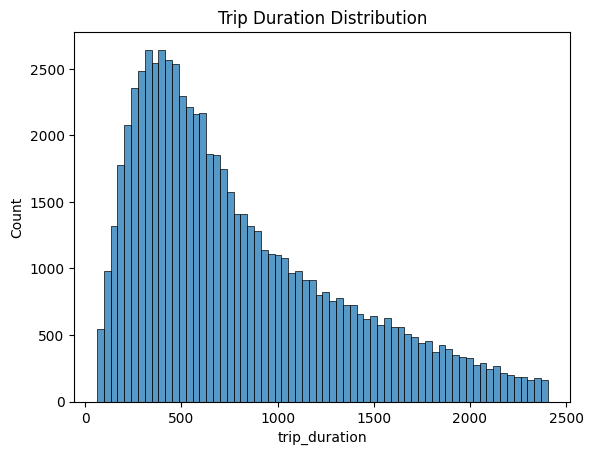

In [17]:
# 이상치 제거 후 분포 시각화
sns.histplot(df['trip_duration'])
plt.title('Trip Duration Distribution')
plt.xlabel('trip_duration')
plt.ylabel('Count')
plt.show()

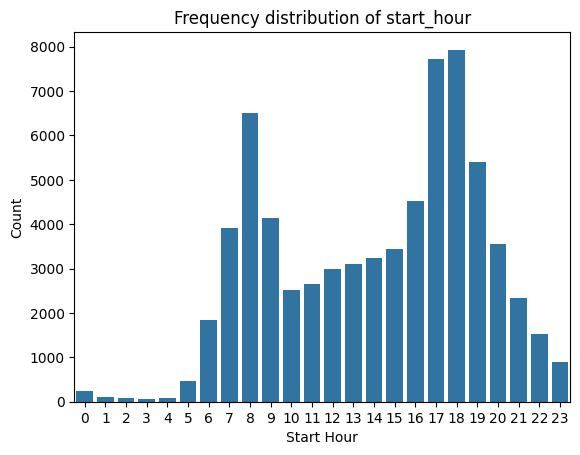

In [23]:
# 빈도 분포 시각화
sns.countplot(x='start_hour', data=df)
plt.title('Frequency distribution of start_hour')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.show()

> 대여 시간이 오전 8시와 17~18시 사이에 가장 많은걸 보면 보통 출근시간대와 퇴근시간대에 많이 분포한다는것을 알 수 있다

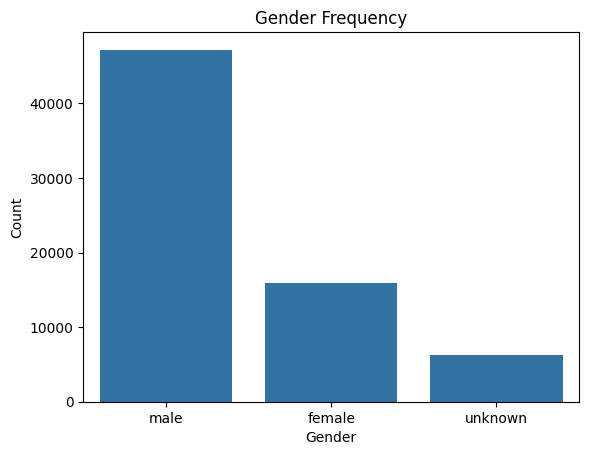

In [22]:
# 성별 빈도 시각화
sns.countplot(x='gender', data=df)
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

> unknown은 성별을 기입을 안한건가?

3. 이진 변수 분석

- `usertype`과 `gender` 간의 관계를 시각화하고, 구독자와 일반 사용자의 성별에는 어떤 특징이 있는지 분석해보세요.

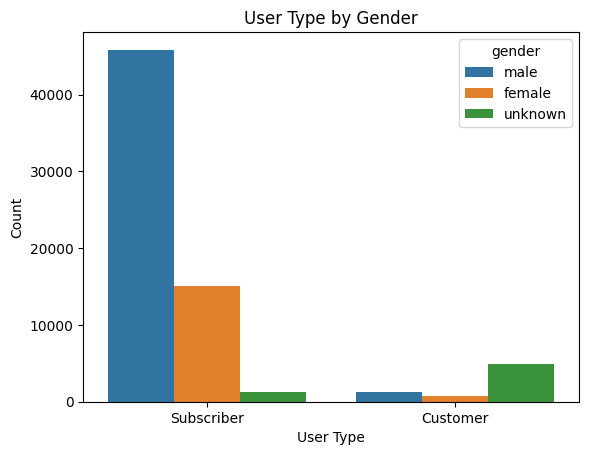

In [29]:
sns.countplot(x='usertype', hue='gender', data=df)
plt.title('User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

> Subscriber(구독자)는 남자 구독자가 여성 구독자보다 훨씬 많다 \
> Customer(일반사용자)는 unknown 비율이 더 높아서 쉽게 유추 불가

4. 다변수 분석

- `start_station_name`, `start_hour`, `trip_duration`을 이용하여 버블 차트를 생성하고, 어떤 시작 지점에서 어떤 시간대에 주행 시간이 긴지 분석해보세요.

- 히트맵을 사용하여 `start_station_name`과 `start_hour` 간의 관계를 시각화하고, 특정 시간대에 대여가 많은 시작 지점을 찾아보세요.